# Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

In [2]:
# data used to identify sensor point numbers with specific equipment
df = pd.read_csv('raw_data/simpson-Point-References.csv', sep=',')

In [3]:
# used to get info about specific features
#df.iloc[0:10]

In [ ]:
# raw sensor data
data = pd.read_csv('raw_data/simpson-Data.csv')

In [5]:
data.head(10)

,<>Date,Time,Point_1,Point_2,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,...,Point_241,Point_242,Point_243,Point_244,Point_245,Point_246,Point_247,Point_248,Point_249,Point_250
0,6/1/2020,00:00:00,0,No Data,20.5,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,16.4,ON,24.0,OFF,19.9,OCC
1,6/1/2020,01:00:00,0,No Data,20.5,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,16.4,ON,24.0,OFF,19.3,OCC
2,6/1/2020,02:00:00,0,No Data,19.9,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,16.4,ON,24.0,OFF,18.7,OCC
3,6/1/2020,03:00:00,0,No Data,19.9,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC
4,6/1/2020,04:00:00,0,No Data,19.4,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC
5,6/1/2020,05:00:00,0,No Data,19.4,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC
6,6/1/2020,06:00:00,0,No Data,23.0,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,21.5,OCC
7,6/1/2020,07:00:00,0,No Data,23.5,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,21.0,OCC
8,6/1/2020,08:00:00,0,No Data,24.0,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,20.4,OCC
9,6/1/2020,09:00:00,0,No Data,24.0,No Data,No Data,OFF,No Data,OFF,...,5,No Data,OFF,OFF,15.8,ON,24.0,OFF,21.5,OCC


In [6]:
data.shape

(8760, 252)

In [7]:
# filter out columns that contain "No Data"
data_scrub = data.loc[:, ~(data == 'No Data').any()].copy()

In [8]:
data_scrub

,<>Date,Time,Point_1,Point_3,Point_6,Point_8,Point_9,Point_10,Point_12,Point_13,...,Point_239,Point_241,Point_243,Point_244,Point_245,Point_246,Point_247,Point_248,Point_249,Point_250
0,6/1/2020,00:00:00,0,20.5,OFF,OFF,413,OFF,OFF,18,...,OFF,5,OFF,OFF,16.4,ON,24.0,OFF,19.9,OCC
1,6/1/2020,01:00:00,0,20.5,OFF,OFF,413,OFF,OFF,18,...,OFF,5,OFF,OFF,16.4,ON,24.0,OFF,19.3,OCC
2,6/1/2020,02:00:00,0,19.9,OFF,OFF,413,OFF,OFF,18,...,OFF,5,OFF,OFF,16.4,ON,24.0,OFF,18.7,OCC
3,6/1/2020,03:00:00,0,19.9,OFF,OFF,413,OFF,OFF,18,...,OFF,5,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC
4,6/1/2020,04:00:00,0,19.4,OFF,OFF,413,OFF,OFF,18,...,OFF,5,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,5/31/2021,19:00:00,0,24.5,OFF,OFF,397,OFF,OFF,24,...,OFF,5,OFF,OFF,17.6,ON,24.0,OFF,26.9,OCC
8756,5/31/2021,20:00:00,0,24.5,OFF,OFF,397,OFF,OFF,24,...,OFF,5,OFF,OFF,17.6,ON,24.0,OFF,26.3,OCC
8757,5/31/2021,21:00:00,0,24.5,OFF,OFF,397,OFF,OFF,24,...,OFF,5,OFF,OFF,17.6,ON,24.0,OFF,25.2,OCC
8758,5/31/2021,22:00:00,0,25.0,OFF,OFF,397,OFF,OFF,24,...,OFF,5,OFF,OFF,17.6,ON,24.0,OFF,24.1,OCC


In [9]:
data_scrub.shape

(8760, 169)

In [10]:
# EDA profiling report to generate a ton of useful info and visuals on the data
# prof = ProfileReport(data_scrub)
# prof.to_file(output_file='initial-exploration.html')

## Baseline Forecasting Model Data

In [11]:
# these features were chosen to begin experimentation with the help of Taylor, from Simpson Controls
x = data_scrub[['<>Date', 'Time','Point_130', 'Point_131', 'Point_132', 'Point_208', 'Point_209']].copy()

In [12]:
# add datetime column
x['Datetime'] = pd.to_datetime((x['<>Date'] + ' ' + x['Time']))

In [13]:
x

,<>Date,Time,Point_130,Point_131,Point_132,Point_208,Point_209,Datetime
0,6/1/2020,00:00:00,2467840,2000,16,412302,14.6,2020-06-01 00:00:00
1,6/1/2020,01:00:00,2467840,2015,16,412302,14.6,2020-06-01 01:00:00
2,6/1/2020,02:00:00,2467840,2030,16,412302,13.6,2020-06-01 02:00:00
3,6/1/2020,03:00:00,2467840,2040,16,412302,13.6,2020-06-01 03:00:00
4,6/1/2020,04:00:00,2467840,2055,16,412302,12.6,2020-06-01 04:00:00
...,...,...,...,...,...,...,...,...
8755,5/31/2021,19:00:00,2682880,3075,14,471954,23.0,2021-05-31 19:00:00
8756,5/31/2021,20:00:00,2682880,3090,14,471954,24.0,2021-05-31 20:00:00
8757,5/31/2021,21:00:00,2682880,3105,27,471954,22.0,2021-05-31 21:00:00
8758,5/31/2021,22:00:00,2682880,3130,30,471954,21.0,2021-05-31 22:00:00


In [14]:
x.isnull().sum()

<>Date       0
Time         0
Point_130    0
Point_131    0
Point_132    0
Point_208    0
Point_209    0
Datetime     0
dtype: int64

In [15]:
x.dtypes

<>Date               object
Time                 object
Point_130             int64
Point_131            object
Point_132            object
Point_208             int64
Point_209           float64
Datetime     datetime64[ns]
dtype: object

In [16]:
x['Point_132'].unique()

array([16, 26, 21, 34, 46, 35, 15, 30, 12, 18, 13, 24, 14, 38, 44, 41, 42,
       47, 29, 27, 39, 33, 28, 19, 40, 45, 43, 49, 31, 10, 11, 25, 23, 22,
       36, 17, 37, 32, 20, 48, 51, 61, 56, 50, 57, 58, 60, 53, 66, 62, 74,
       71, 72, 52, 70, 83, 82, 65, 63, 59, 64, 76, 73, 54, 75, 55, 69,
       '43', '37', '20', '12', '29', '28', '15', '24', '41', '42', '47',
       '44', '36', '17', '21', '48', '45', '71', '31', '13', '19', '14',
       '32', '34', '16', '33', '50', '46', '40', '18', '22', '27', '25',
       '30', '39', '53', '23', '49', '35', '38', '51', '26', '11', '52',
       '54', '55', '62', '57', '56', 'Data Loss', '10', 9], dtype=object)

In [17]:
x['Point_131'].unique()

array(['2000', '2015', '2030', ..., 3105, 3130, 3155], dtype=object)

In [18]:
x['Point_130'].unique()

array([2467840, 2478080, 2488320, 2498560, 2508800, 2519040, 2529280,
       2539520, 2549760, 2560000, 2570240, 2580480, 2590720, 2600960,
       2611200, 2621440, 2631680, 2641920, 2652160, 2662400, 2672640,
       2682880])

In [19]:
# change column type to numeric value, and "Data Loss" becomes NaN
x['Point_131'] = pd.to_numeric(x['Point_131'], errors='coerce')
x['Point_132'] = pd.to_numeric(x['Point_132'], errors='coerce')


In [20]:
x.dtypes

<>Date               object
Time                 object
Point_130             int64
Point_131           float64
Point_132           float64
Point_208             int64
Point_209           float64
Datetime     datetime64[ns]
dtype: object

In [21]:
x.describe()

,Point_130,Point_131,Point_132,Point_208,Point_209
count,8.760000e+03,8714.000000,8756.000000,8760.000000,8760.000000
mean,2.570376e+06,5121.433326,25.409319,434943.068493,13.061256
std,6.363684e+04,2956.072848,12.780540,21840.270631,6.247648
min,2.467840e+06,0.000000,9.000000,412302.000000,-1.400000
25%,2.519040e+06,2560.000000,15.000000,413802.000000,7.600000
50%,2.570240e+06,5137.000000,20.000000,427502.000000,12.500000
75%,2.621440e+06,7670.000000,35.000000,457027.000000,17.600000
max,2.682880e+06,10239.000000,83.000000,471954.000000,32.600000


In [22]:
x.isnull().sum()

<>Date        0
Time          0
Point_130     0
Point_131    46
Point_132     4
Point_208     0
Point_209     0
Datetime      0
dtype: int64

In [23]:
x[x['Point_131'].isnull()]

,<>Date,Time,Point_130,Point_131,Point_132,Point_208,Point_209,Datetime
2102,8/27/2020,14:00:00,2508800,NaN,48.0,413802,21.6,2020-08-27 14:00:00
2103,8/27/2020,15:00:00,2508800,NaN,53.0,413802,23.6,2020-08-27 15:00:00
2104,8/27/2020,16:00:00,2508800,NaN,47.0,413802,23.6,2020-08-27 16:00:00
2105,8/27/2020,17:00:00,2508800,NaN,47.0,413802,24.6,2020-08-27 17:00:00
2106,8/27/2020,18:00:00,2508800,NaN,27.0,413802,24.6,2020-08-27 18:00:00
2107,8/27/2020,19:00:00,2508800,NaN,12.0,413802,23.6,2020-08-27 19:00:00
2108,8/27/2020,20:00:00,2508800,NaN,12.0,413802,21.6,2020-08-27 20:00:00
2109,8/27/2020,21:00:00,2508800,NaN,30.0,413802,21.6,2020-08-27 21:00:00
2110,8/27/2020,22:00:00,2508800,NaN,29.0,413802,20.6,2020-08-27 22:00:00
2111,8/27/2020,23:00:00,2508800,NaN,15.0,413802,20.6,2020-08-27 23:00:00


In [24]:
x['Point_131'].loc[2100:2120]

2100    9800.0
2101    9845.0
2102       NaN
2103       NaN
2104       NaN
2105       NaN
2106       NaN
2107       NaN
2108       NaN
2109       NaN
2110       NaN
2111       NaN
2112       NaN
2113       NaN
2114       NaN
2115       NaN
2116       NaN
2117       NaN
2118       NaN
2119      30.0
2120      65.0
Name: Point_131, dtype: float64

In [ ]:
# manual imputation of NaN values for Point_131 (Energy Consumption)
x['Point_131'][2102] = 9890
x['Point_131'][2103] = 9940
x['Point_131'][2104] = 9985
x['Point_131'][2105] = 10030
x['Point_131'][2106] = 10055
x['Point_131'][2107] = 10065
x['Point_131'][2108] = 10075
x['Point_131'][2109] = 10100
x['Point_131'][2110] = 10125
x['Point_131'][2111] = 10140
x['Point_131'][2112] = 10150
x['Point_131'][2113] = 10165
x['Point_131'][2114] = 10190
x['Point_131'][2115] = 10210
x['Point_131'][2116] = 10225
x['Point_131'][2117] = 0
x['Point_131'][2118] = 15

In [ ]:
# manual imputation of NaN values for Point_131 (Energy Consumption)
x['Point_131'][7755] = 345
x['Point_131'][7756] = 360
x['Point_131'][7757] = 380
x['Point_131'][7758] = 405
x['Point_131'][7759] = 425
x['Point_131'][7760] = 455
x['Point_131'][7761] = 500
x['Point_131'][7762] = 545
x['Point_131'][7763] = 590
x['Point_131'][7764] = 625
x['Point_131'][7765] = 655
x['Point_131'][7766] = 700
x['Point_131'][7767] = 735
x['Point_131'][7768] = 770
x['Point_131'][7769] = 810
x['Point_131'][7770] = 850
x['Point_131'][7771] = 870
x['Point_131'][7772] = 890
x['Point_131'][7773] = 905
x['Point_131'][7774] = 930
x['Point_131'][7775] = 955
x['Point_131'][7776] = 970
x['Point_131'][7777] = 985
x['Point_131'][7778] = 1000
x['Point_131'][7779] = 1020
x['Point_131'][7780] = 1035
x['Point_131'][7781] = 1050
x['Point_131'][7782] = 1065
x['Point_131'][7783] = 1090

In [ ]:
# manual imputation of NaN values for Point_132 (Energy Demand)
x['Point_132'][7754] = 20.0
x['Point_132'][7755] = 13.0
x['Point_132'][7756] = 15.0
x['Point_132'][7757] = 15.0

In [28]:
# all manual imputation has been done with consent from Simpson Controls
# check that it has been successful below
x.iloc[2090:2122]
x.iloc[7750:7787]

,<>Date,Time,Point_130,Point_131,Point_132,Point_208,Point_209,Datetime
7750,4/19/2021,22:00:00,2662400,255.0,27.0,468002,18.5,2021-04-19 22:00:00
7751,4/19/2021,23:00:00,2662400,280.0,27.0,468002,17.5,2021-04-19 23:00:00
7752,4/20/2021,00:00:00,2662400,295.0,15.0,468002,16.5,2021-04-20 00:00:00
7753,4/20/2021,01:00:00,2662400,310.0,15.0,468002,16.5,2021-04-20 01:00:00
7754,4/20/2021,02:00:00,2662400,330.0,20.0,468002,15.5,2021-04-20 02:00:00
7755,4/20/2021,03:00:00,2662400,345.0,13.0,468002,13.5,2021-04-20 03:00:00
7756,4/20/2021,04:00:00,2662400,360.0,15.0,468002,12.5,2021-04-20 04:00:00
7757,4/20/2021,05:00:00,2662400,380.0,15.0,468002,12.5,2021-04-20 05:00:00
7758,4/20/2021,06:00:00,2662400,405.0,24.0,468102,11.5,2021-04-20 06:00:00
7759,4/20/2021,07:00:00,2662400,425.0,19.0,468102,11.5,2021-04-20 07:00:00


In [29]:
# use differencing to create per hour values, instead of cumulative
x['Energy'] = x['Point_130'].diff()

In [30]:
# change points that need to be handled
# sensor readings reach a max cumulative value of 10240 and reset to 0
x[x['Energy'] != 0]

,<>Date,Time,Point_130,Point_131,Point_132,Point_208,Point_209,Datetime,Energy
0,6/1/2020,00:00:00,2467840,2000.0,16.0,412302,14.6,2020-06-01 00:00:00,NaN
368,6/16/2020,08:00:00,2478080,25.0,37.0,413202,13.6,2020-06-16 08:00:00,10240.0
848,7/6/2020,08:00:00,2488320,0.0,32.0,413702,16.6,2020-07-06 08:00:00,10240.0
1269,7/23/2020,21:00:00,2498560,0.0,27.0,413702,21.6,2020-07-23 21:00:00,10240.0
1696,8/10/2020,16:00:00,2508800,20.0,52.0,413702,24.6,2020-08-10 16:00:00,10240.0
2117,8/28/2020,05:00:00,2519040,0.0,13.0,413802,16.6,2020-08-28 05:00:00,10240.0
2580,9/16/2020,12:00:00,2529280,10.0,37.0,414002,19.6,2020-09-16 12:00:00,10240.0
3046,10/5/2020,22:00:00,2539520,0.0,31.0,414802,15.6,2020-10-05 22:00:00,10240.0
3469,10/23/2020,13:00:00,2549760,20.0,47.0,417302,7.6,2020-10-23 13:00:00,10240.0
3876,11/9/2020,11:00:00,2560000,45.0,52.0,421202,4.6,2020-11-09 11:00:00,10240.0


In [31]:
# calculate energy use for every hour from cummulative total
x['Hourly-Energy-Cons'] = x['Point_131'].diff()

In [32]:
x['Hourly-Energy-Cons'][368]

-10205.0

In [33]:
10240 - x['Point_131'][367] + x['Point_131'][368]

35.0

In [34]:
 manual_calc_rows_list = x[x['Energy'] != 0].index

In [35]:
# loop to clean Low-Energy-Cons values on 10240 reset
for row in manual_calc_rows_list:
    if (row == 0) or x['Hourly-Energy-Cons'][row] == np.nan:
        continue
    x['Hourly-Energy-Cons'][row] = 10240 - x['Point_131'][row - 1] + x['Point_131'][row]

<ipython-input-35-8ccc3878c5ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Hourly-Energy-Cons'][row] = 10240 - x['Point_131'][row - 1] + x['Point_131'][row]


In [36]:
# check that values were cleaned to create per hour consumption
x.iloc[6600:6620]

,<>Date,Time,Point_130,Point_131,Point_132,Point_208,Point_209,Datetime,Energy,Hourly-Energy-Cons
6600,3/2/2021,23:00:00,2621440,10120.0,24.0,457402,8.5,2021-03-02 23:00:00,0.0,25.0
6601,3/3/2021,00:00:00,2621440,10135.0,21.0,457402,8.5,2021-03-03 00:00:00,0.0,15.0
6602,3/3/2021,01:00:00,2621440,10150.0,16.0,457402,8.5,2021-03-03 01:00:00,0.0,15.0
6603,3/3/2021,02:00:00,2621440,10165.0,15.0,457402,7.5,2021-03-03 02:00:00,0.0,15.0
6604,3/3/2021,03:00:00,2621440,10180.0,15.0,457402,7.5,2021-03-03 03:00:00,0.0,15.0
6605,3/3/2021,04:00:00,2621440,10200.0,15.0,457402,7.5,2021-03-03 04:00:00,0.0,20.0
6606,3/3/2021,05:00:00,2621440,10215.0,15.0,457402,7.5,2021-03-03 05:00:00,0.0,15.0
6607,3/3/2021,06:00:00,2631680,5.0,27.0,457502,7.5,2021-03-03 06:00:00,10240.0,30.0
6608,3/3/2021,07:00:00,2631680,35.0,29.0,457502,7.5,2021-03-03 07:00:00,0.0,30.0
6609,3/3/2021,08:00:00,2631680,75.0,47.0,457502,7.5,2021-03-03 08:00:00,0.0,40.0


In [37]:
x.describe()

,Point_130,Point_131,Point_132,Point_208,Point_209,Energy,Hourly-Energy-Cons
count,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8759.000000,8759.000000
mean,2.570376e+06,5114.320205,25.404909,434943.068493,13.061256,24.550748,24.682612
std,6.363684e+04,2967.150132,12.779407,21840.270631,6.247648,500.824874,12.692877
min,2.467840e+06,0.000000,9.000000,412302.000000,-1.400000,0.000000,0.000000
25%,2.519040e+06,2540.000000,15.000000,413802.000000,7.600000,0.000000,15.000000
50%,2.570240e+06,5130.000000,20.000000,427502.000000,12.500000,0.000000,20.000000
75%,2.621440e+06,7670.000000,35.000000,457027.000000,17.600000,0.000000,35.000000
max,2.682880e+06,10239.000000,83.000000,471954.000000,32.600000,10240.000000,75.000000


In [38]:
hourly_energy_cons = x['Hourly-Energy-Cons']

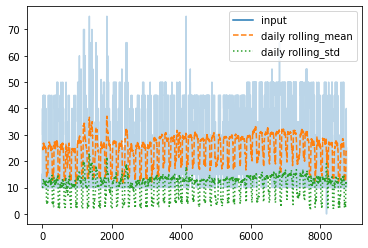

In [39]:
# rolling windows
rolling = hourly_energy_cons.rolling(24, center=True)

data = pd.DataFrame({'input': hourly_energy_cons,
                     'daily rolling_mean': rolling.mean(),
                     'daily rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

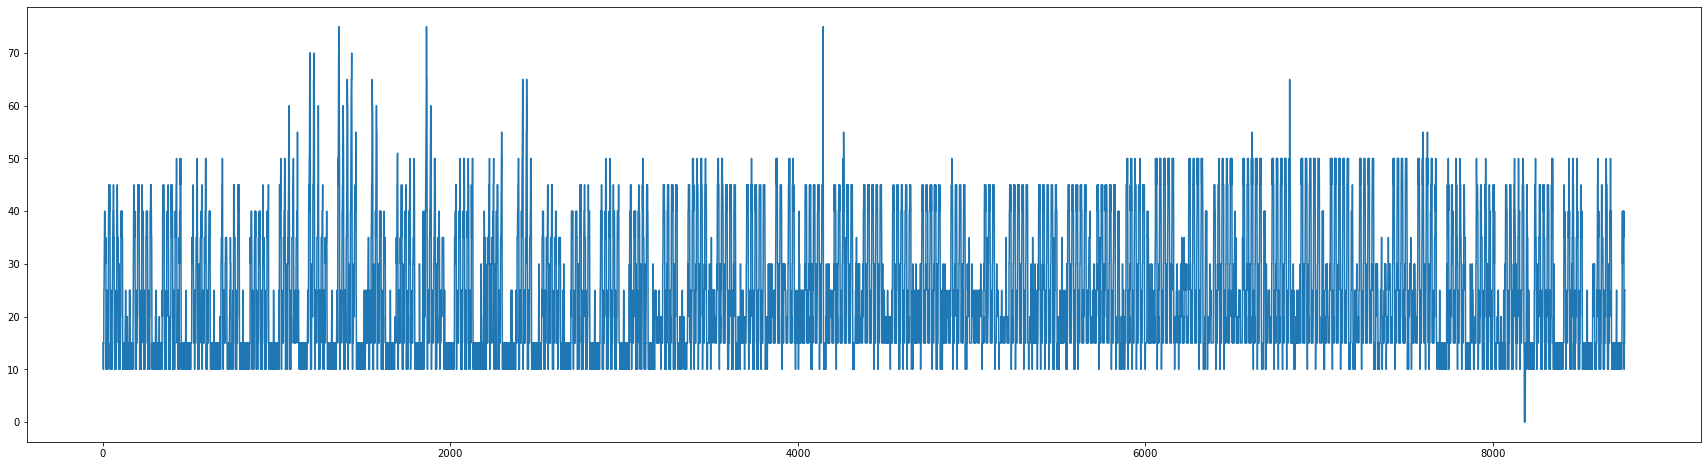

In [40]:
# plot of energy consumption data for the year
plt.figure(figsize=(30, 8))
plt.plot(hourly_energy_cons);

In [41]:
x.isnull().sum()

<>Date                0
Time                  0
Point_130             0
Point_131             0
Point_132             0
Point_208             0
Point_209             0
Datetime              0
Energy                1
Hourly-Energy-Cons    1
dtype: int64

In [42]:
clean_data = x[['Datetime', 'Hourly-Energy-Cons', 'Point_132', 'Point_209']][1:].copy()
clean_data.columns=['Datetime', 'Hourly Energy Cons (kWh)', 'Energy Demand (kW)', 'Outside Air Temp (C)']
clean_data

,Datetime,Hourly Energy Cons (kWh),Energy Demand (kW),Outside Air Temp (C)
1,2020-06-01 01:00:00,15.0,16.0,14.6
2,2020-06-01 02:00:00,15.0,16.0,13.6
3,2020-06-01 03:00:00,10.0,16.0,13.6
4,2020-06-01 04:00:00,15.0,16.0,12.6
5,2020-06-01 05:00:00,15.0,16.0,12.6
...,...,...,...,...
8755,2021-05-31 19:00:00,10.0,14.0,23.0
8756,2021-05-31 20:00:00,15.0,14.0,24.0
8757,2021-05-31 21:00:00,15.0,27.0,22.0
8758,2021-05-31 22:00:00,25.0,30.0,21.0


In [43]:
# export to csv
#clean_data.to_csv('forecast_data_v1.csv', index=False)

## Supervised Learning Model Data

In [44]:
# first row of data must be removed because of differencing for 'Hourly Energy Cons (kWh)'
model_data = data_scrub[1:].copy()
# add target
model_data['Hourly Energy Cons (kWh)'] = clean_data['Hourly Energy Cons (kWh)']
# drop Date, Time, Point_130 and Point_131 (used to create Hourly Cons)
model_data = model_data.drop(['<>Date', 'Time', 'Point_130', 'Point_131'], axis=1)
model_data.head()

,Point_1,Point_3,Point_6,Point_8,Point_9,Point_10,Point_12,Point_13,Point_14,Point_15,...,Point_241,Point_243,Point_244,Point_245,Point_246,Point_247,Point_248,Point_249,Point_250,Hourly Energy Cons (kWh)
1,0,20.5,OFF,OFF,413,OFF,OFF,18,OFF,OFF,...,5,OFF,OFF,16.4,ON,24.0,OFF,19.3,OCC,15.0
2,0,19.9,OFF,OFF,413,OFF,OFF,18,OFF,OFF,...,5,OFF,OFF,16.4,ON,24.0,OFF,18.7,OCC,15.0
3,0,19.9,OFF,OFF,413,OFF,OFF,18,OFF,OFF,...,5,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC,10.0
4,0,19.4,OFF,OFF,413,OFF,OFF,18,OFF,OFF,...,5,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC,15.0
5,0,19.4,OFF,OFF,413,ON,OFF,18,OFF,OFF,...,5,OFF,OFF,15.8,ON,24.0,OFF,18.2,OCC,15.0


In [45]:
model_data.dtypes

Point_1                       int64
Point_3                     float64
Point_6                      object
Point_8                      object
Point_9                       int64
                             ...   
Point_247                   float64
Point_248                    object
Point_249                    object
Point_250                    object
Hourly Energy Cons (kWh)    float64
Length: 166, dtype: object

In [46]:
# export to csv
#model_data.to_csv('model_data_v1.csv', index=False)